In [9]:
import os
import json
import os, subprocess, time
import numpy as np
from PIL import Image, ImageOps
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn import tree
from xgboost import XGBClassifier
import graphviz

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 100

from google.colab import drive
import time

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!cp -r /content/drive/'Shared drives'/'ML Final Project'/xray_dataset_pooled /content/

In [4]:
xtrain = np.load('/content/xray_dataset_pooled/train_processed.npy')
ytrain = np.load('/content/xray_dataset_pooled/train_labels.npy')
xtest = np.load('/content/xray_dataset_pooled/test_processed.npy')
ytest = np.load('/content/xray_dataset_pooled/test_labels.npy')
xval = np.load('/content/xray_dataset_pooled/val_processed.npy')
yval = np.load('/content/xray_dataset_pooled/val_labels.npy')

In [ ]:
xtrain.shape

(5216, 43750)

In [ ]:
ytrain.shape

(5216,)

In [5]:
def cv_confusion_matrix(clf, X, y, folds=5):
    skf = StratifiedKFold(n_splits=folds)
    cv_iter = skf.split(X, y)
    cms = np.zeros((2,2), dtype=int)

    for train, test in cv_iter:
        clf.fit(X[train,], y[train])
        cm = confusion_matrix(y[test], clf.predict(X[test]), labels=clf.classes_)
        cms = np.add(cms, cm)
    return cms

In [8]:
clf = tree.DecisionTreeClassifier()

In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
#for run time measurements
#t0 = time.time()
#clf.fit(xtrain, ytrain)
#t1 = time.time()
#print("DT runtime: ", t1-t0)

DT runtime:  267.5361888408661


In [ ]:
dt_cm = cv_confusion_matrix(clf, xtrain, ytrain)

In [ ]:
dt_cm

array([[1051,  290],
       [ 256, 3619]])

In [ ]:
np.save('dt_cm.npy', np.array(dt_cm))

Text(0.5, 1.0, '5-fold CV Decision Tree')

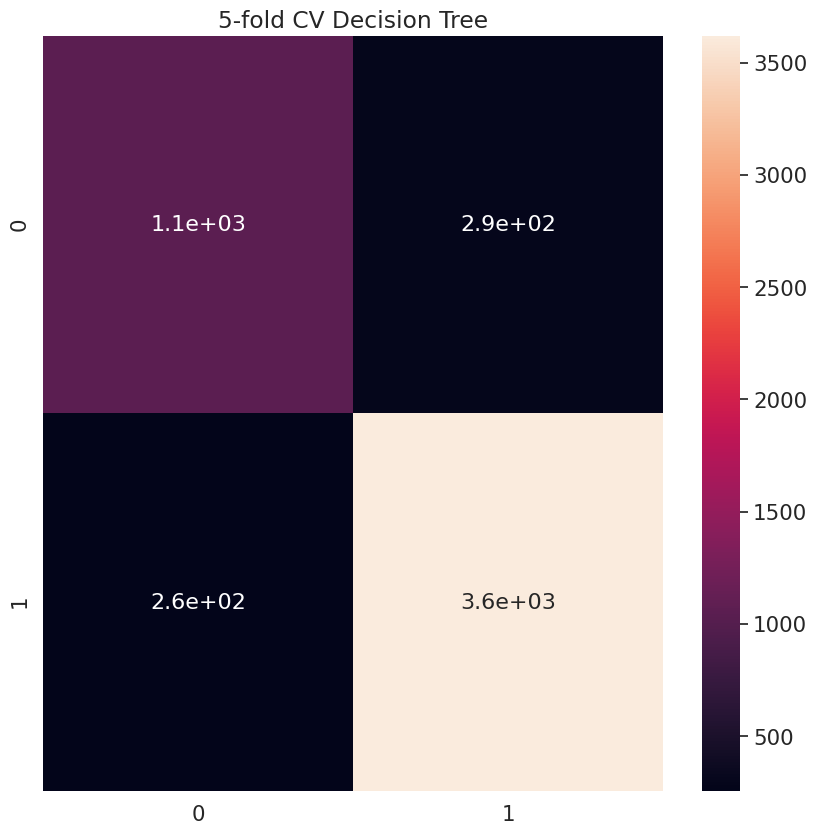

In [ ]:
df_cm = pd.DataFrame(dt_cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title("5-fold CV Decision Tree")
#plt.show()

In [ ]:
#clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_ypred = clf.predict(xtest)

In [ ]:
cm = confusion_matrix(ytest, dt_ypred, labels=clf.classes_)

Text(0.5, 1.0, 'Test Decision Tree')

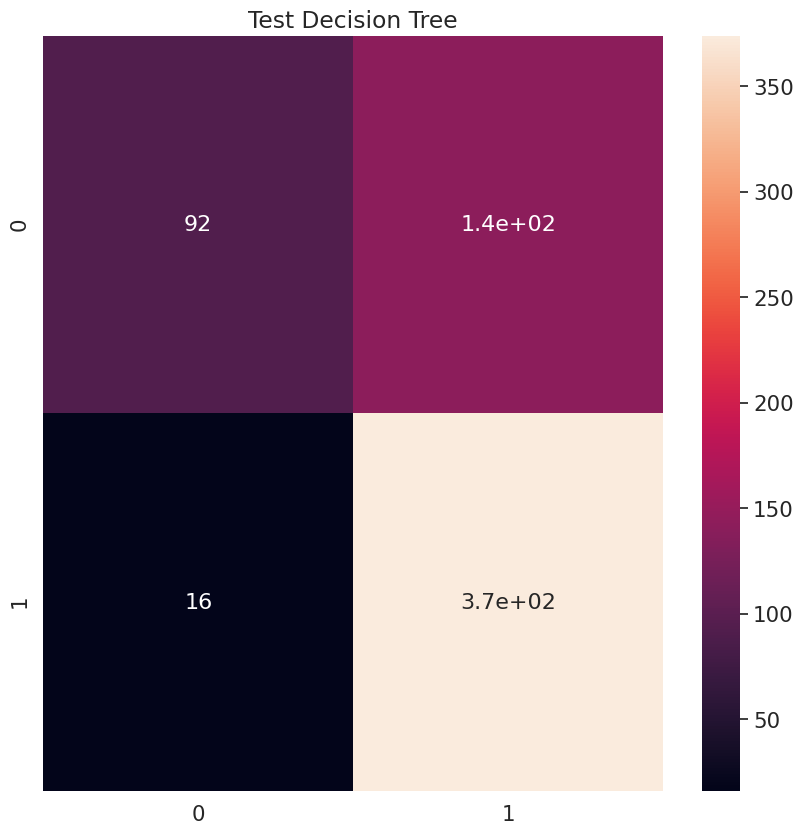

In [ ]:
df_cm = pd.DataFrame(cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title("Test Decision Tree")
#plt.show()

In [ ]:
np.save('dt_ypred.npy', np.array(dt_ypred))

In [ ]:
clf.score(xtest, ytest)

0.7467948717948718

[Text(221.96671545667448, 212.71304347826086, 'X[84] <= 210.5\ngini = 0.382\nsamples = 4173\nvalue = [1073, 3100]'),
 Text(154.2177400468384, 203.2591304347826, 'X[43225] <= 0.5\ngini = 0.247\nsamples = 3364\nvalue = [485, 2879]'),
 Text(84.58208430913349, 193.80521739130435, 'X[129] <= 39.5\ngini = 0.46\nsamples = 1122\nvalue = [402, 720]'),
 Text(35.28337236533958, 184.3513043478261, 'X[38642] <= 149.5\ngini = 0.387\nsamples = 233\nvalue = [172, 61]'),
 Text(17.249648711943795, 174.89739130434782, 'X[27606] <= 93.0\ngini = 0.484\nsamples = 73\nvalue = [30, 43]'),
 Text(9.408899297423888, 165.44347826086957, 'X[32651] <= 185.5\ngini = 0.375\nsamples = 32\nvalue = [24, 8]'),
 Text(6.272599531615925, 155.98956521739132, 'X[36675] <= 145.0\ngini = 0.198\nsamples = 27\nvalue = [24, 3]'),
 Text(3.1362997658079625, 146.53565217391304, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(9.408899297423888, 146.53565217391304, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(12.54519906323185

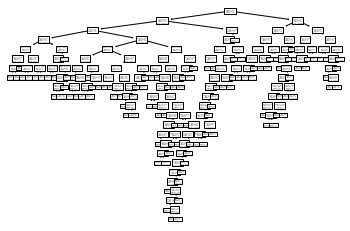

In [ ]:
tree.plot_tree(clf)

In [ ]:
dot_data = tree.export_graphviz(clf, out_file='tree.dot')
graph = graphviz.Source(dot_data)

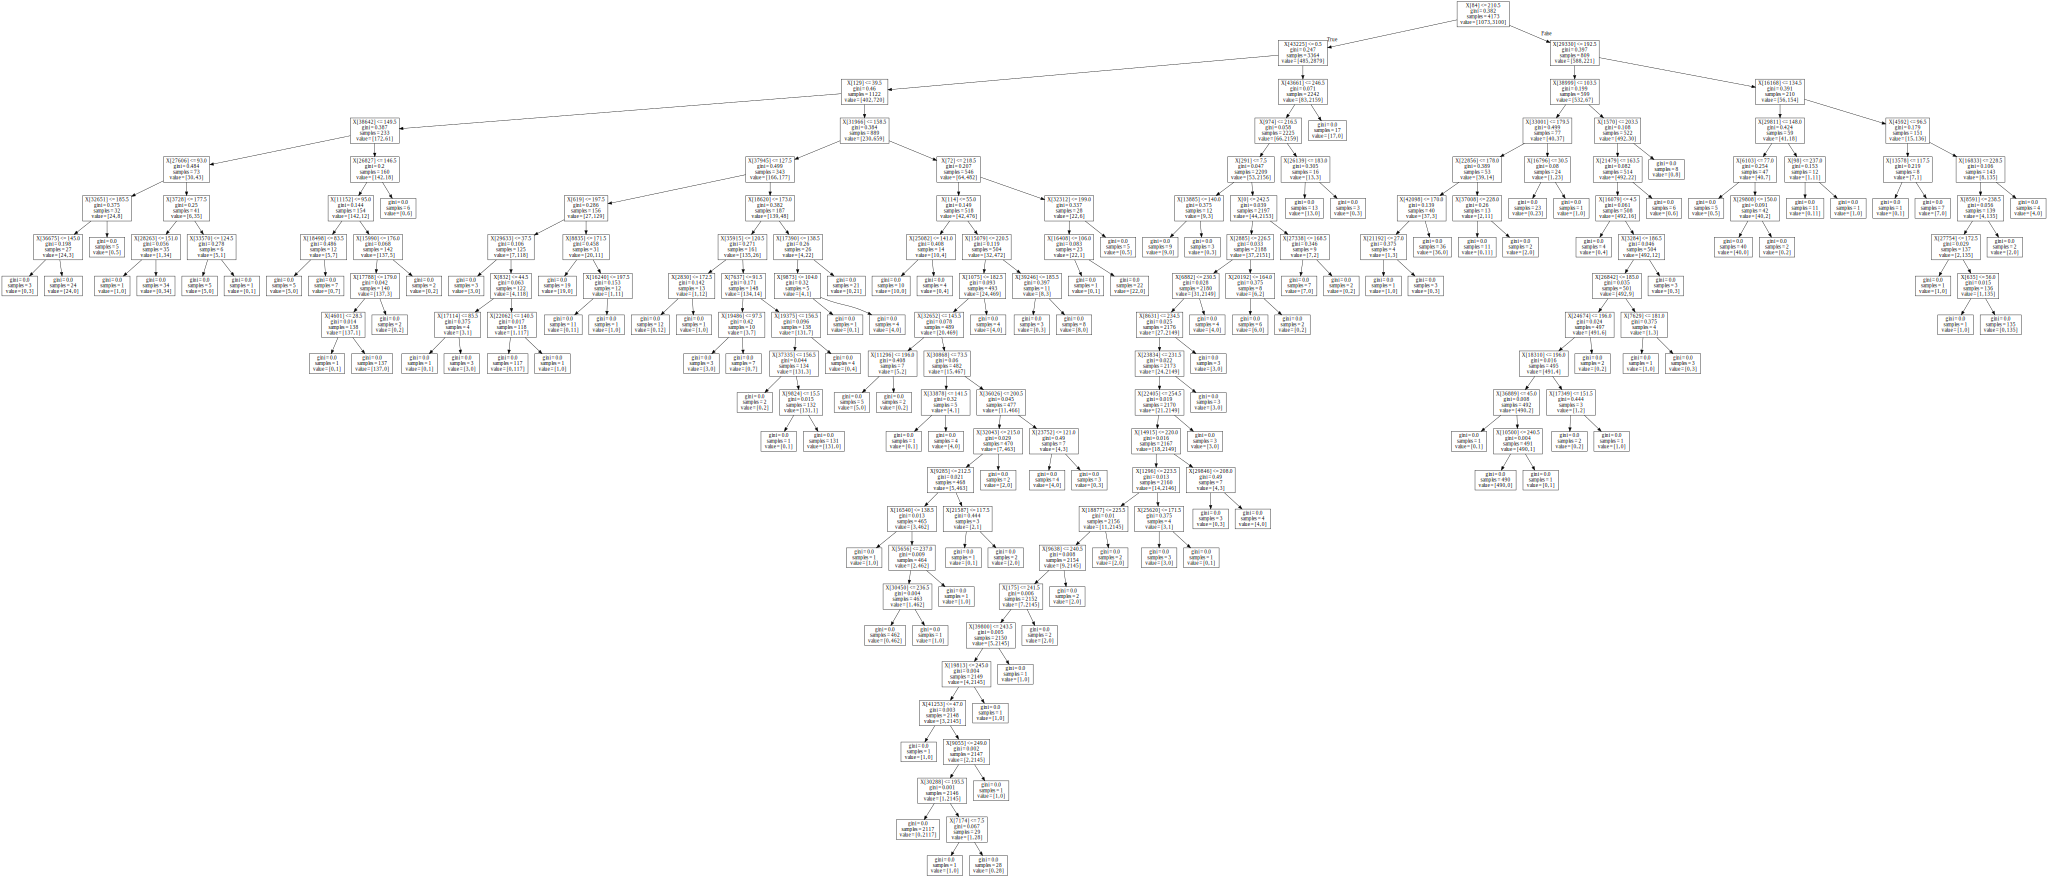

In [ ]:
graph

In [ ]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier()

In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
#for run time measurements
#t0 = time.time()
#rf.fit(xtrain, ytrain)
#t1 = time.time()
#print("RF runtime: ", t1-t0)

RF runtime:  73.57790899276733


In [ ]:
rf_cm = cv_confusion_matrix(rf, xtrain, ytrain)

In [ ]:
rf_cm

array([[1191,  150],
       [  55, 3820]])

In [ ]:
np.save('dt_cm.npy', np.array(rf_cm))

Text(0.5, 1.0, '5-fold CV Random Forest')

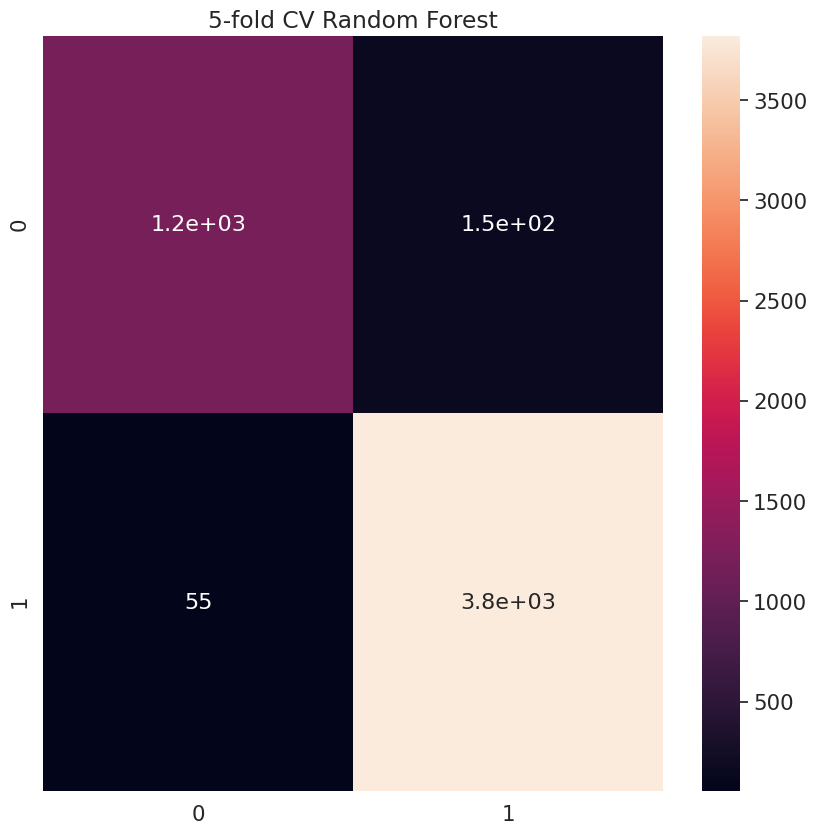

In [ ]:
rf_cm_df = pd.DataFrame(rf_cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(rf_cm_df, annot=True, annot_kws={"size": 16}) # font size
plt.title("5-fold CV Random Forest")
#plt.show()

In [ ]:
#rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_ypred = rf.predict(xtest)

In [ ]:
np.save('rf_ypred.npy', np.array(rf_ypred))

In [ ]:
rf.score(xtest, ytest)

0.7644230769230769

Text(0.5, 1.0, 'Test Random Forest')

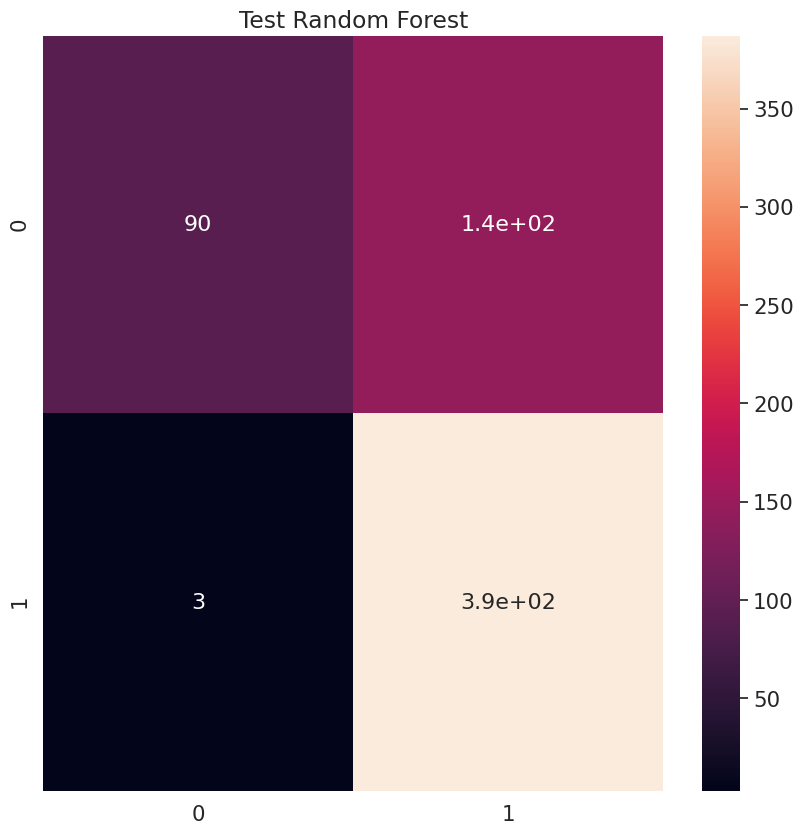

In [ ]:
rf_test_cm = confusion_matrix(ytest, rf_ypred, labels=clf.classes_)
df_test_rf = pd.DataFrame(rf_test_cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_test_rf, annot=True, annot_kws={"size": 16}) # font size
plt.title("Test Random Forest")
#plt.show()

In [14]:
from sklearn.svm import SVC

In [15]:
svm = SVC()

In [ ]:
svm

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
#for run time measurements
#t0 = time.time()
#svm.fit(xtrain, ytrain)
#t1 = time.time()
#print("SVM runtime: ", t1-t0)

SVM runtime:  281.1331675052643


In [ ]:
svm_cm = cv_confusion_matrix(svm, xtrain, ytrain)

In [ ]:
svm_cm

array([[1266,   75],
       [  66, 3809]])

In [ ]:
np.save('svm_cm.npy', np.array(svm_cm))

Text(0.5, 1.0, '5-fold CV SVM')

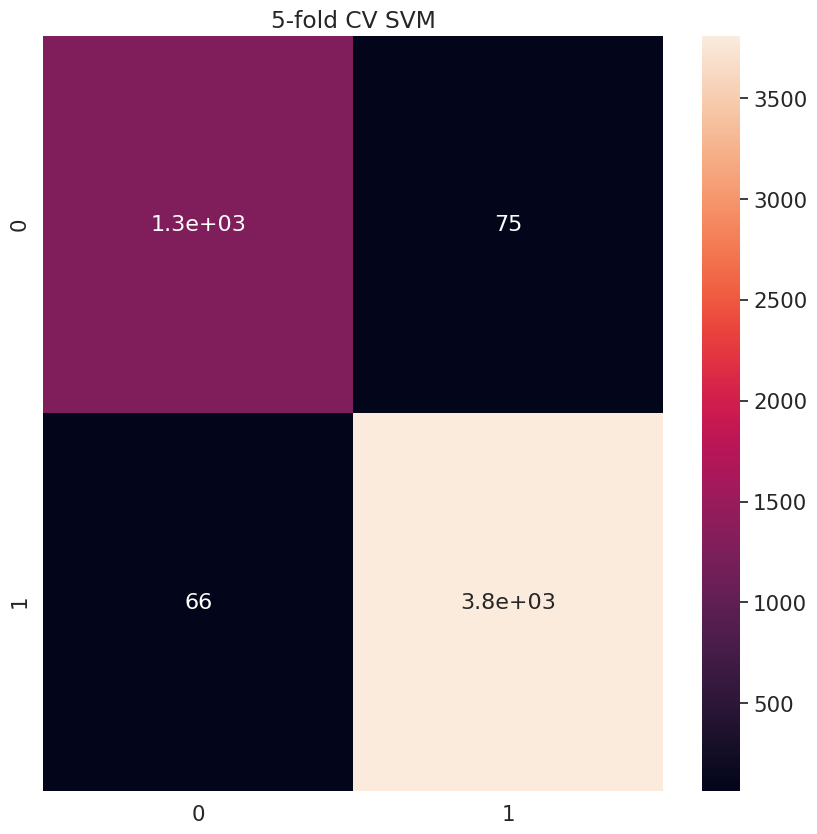

In [ ]:
svm_cm_df = pd.DataFrame(svm_cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(svm_cm_df, annot=True, annot_kws={"size": 16}) # font size
plt.title("5-fold CV SVM")
#plt.show()

In [ ]:
#svm.fit(xtrain, ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_ypred = svm.predict(xtest)

In [ ]:
np.save('svm_ypred.npy', np.array(svm_ypred))

In [ ]:
svm.score(xtest, ytest)

0.7772435897435898

Text(0.5, 1.0, 'Test SVM')

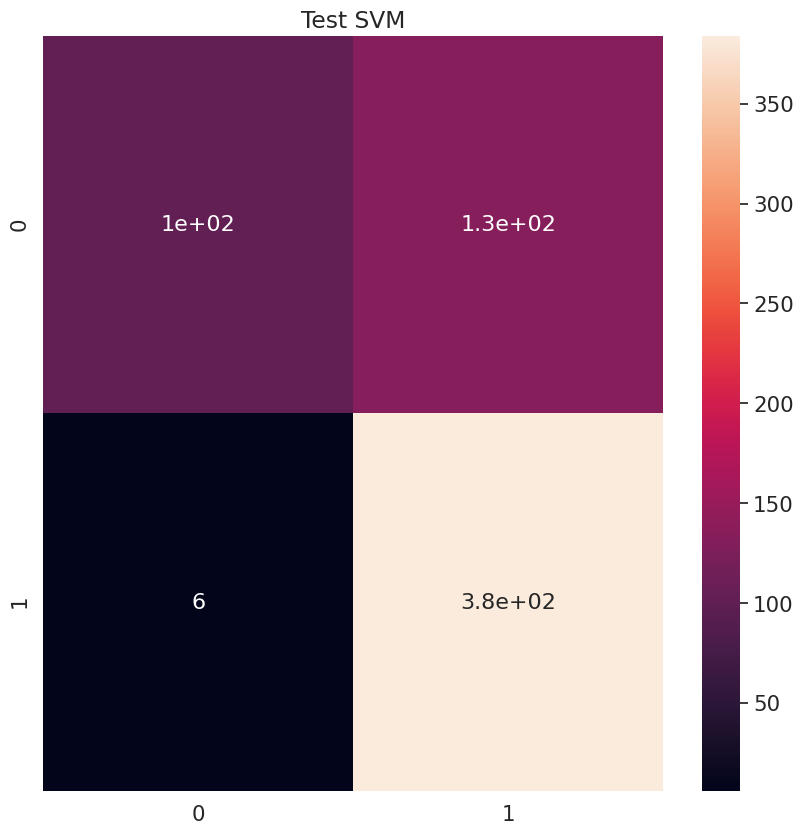

In [ ]:
svm_test_cm = confusion_matrix(ytest, svm_ypred, labels=clf.classes_)
df_test_svm = pd.DataFrame(svm_test_cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_test_svm, annot=True, annot_kws={"size": 16}) # font size
plt.title("Test SVM")
#plt.show()

In [6]:
xgb = XGBClassifier()

In [7]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [7]:
#for run time measurements
t0 = time.time()
xgb.fit(xtrain, ytrain)
t1 = time.time()
print("XGB runtime: ", t1-t0)

XGB runtime:  630.7517511844635


In [8]:
xgb_cm = cv_confusion_matrix(xgb, xtrain, ytrain)

In [10]:
xgb_cm

array([[1204,  137],
       [  52, 3823]])

In [12]:
np.save('xgb_cm.npy', np.array(xgb_cm))

Text(0.5, 1.0, '5-fold CV XGB')

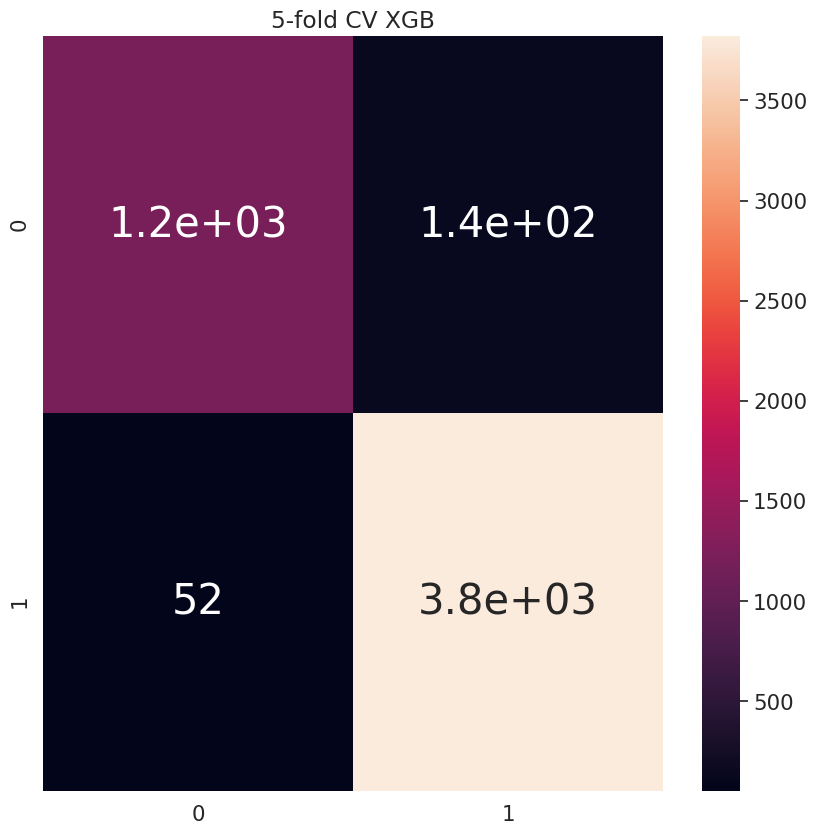

In [13]:
xgb_cm_df = pd.DataFrame(xgb_cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(xgb_cm_df, annot=True, annot_kws={"size": 30}) # font size
plt.title("5-fold CV XGB")
#plt.show()

In [14]:
xgb_ypred = xgb.predict(xtest)

In [15]:
xgb.score(xtest, ytest)

0.7291666666666666

Text(0.5, 1.0, 'Test XGB')

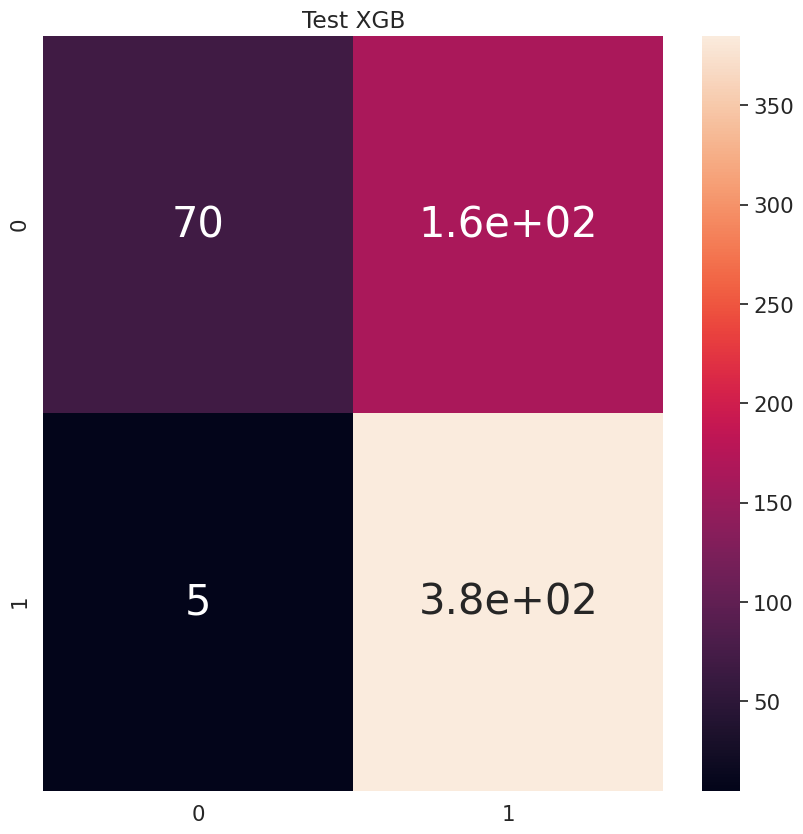

In [18]:
xgb_test_cm = confusion_matrix(ytest, xgb_ypred, labels=xgb.classes_)
df_test_xgb = pd.DataFrame(xgb_test_cm, range(2), range(2))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_test_xgb, annot=True, annot_kws={"size": 30}) # font size
plt.title("Test XGB")
#plt.show()